# Complete Process of Multivariate Exploratory Data Analysis

In [1]:
!pip install -q watermark

In [2]:
# Package to create missing values graph
!pip install -q missingno

In [3]:
# Imports
import sklearn
import scipy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer #treatment missing values
from sklearn.preprocessing import StandardScaler #standardize data
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime #work with date column
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [4]:
# Load data
df_data = pd.read_csv('dataset.csv')

In [5]:
# Shape data
df_data.shape

(2240, 29)

In [6]:
#Sample
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"$58,138.00",0,0,10/17/13,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"$46,344.00",1,1,10/13/13,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"$71,613.00",0,0,13/12/2010,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"$26,646.00",1,0,9/30/13,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"$58,293.00",1,0,13/03/2007,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
# Info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2    Education           2240 non-null   object
 3    Marital_Status      2240 non-null   object
 4   Income               2216 non-null   object
 5    Kidhome             2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9    MntWines            2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11   MntMeatProducts     2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Data Cleaning and Processing

There is no rule for the next steps. Each professional decides whether to build the graphs before or after cleaning and processing the data. I personally decided to clean and process the data first.

I detected, for example, the '$' symbol, the Dt_Customer is not in DateTime format. I will fix it first.

In [8]:
# Removing spaces in column titles
# .str because the type of the columns is object (string)
df_data.columns = df_data.columns.str.replace(' ', '')

In [9]:
# Removing the character $ from the 'Income' column
# removing the comma, otherwise the pandas keep considering it as an object type
# astype changing the column format to float. 
df_data['Income'] = df_data['Income'].str.replace('$','').str.replace(',','').astype(float)

In [10]:
# The 'Dt_Customer' is not in datetime formart. I need to fix it
df_data ['Dt_Customer'] = pd.to_datetime(df_data['Dt_Customer'])

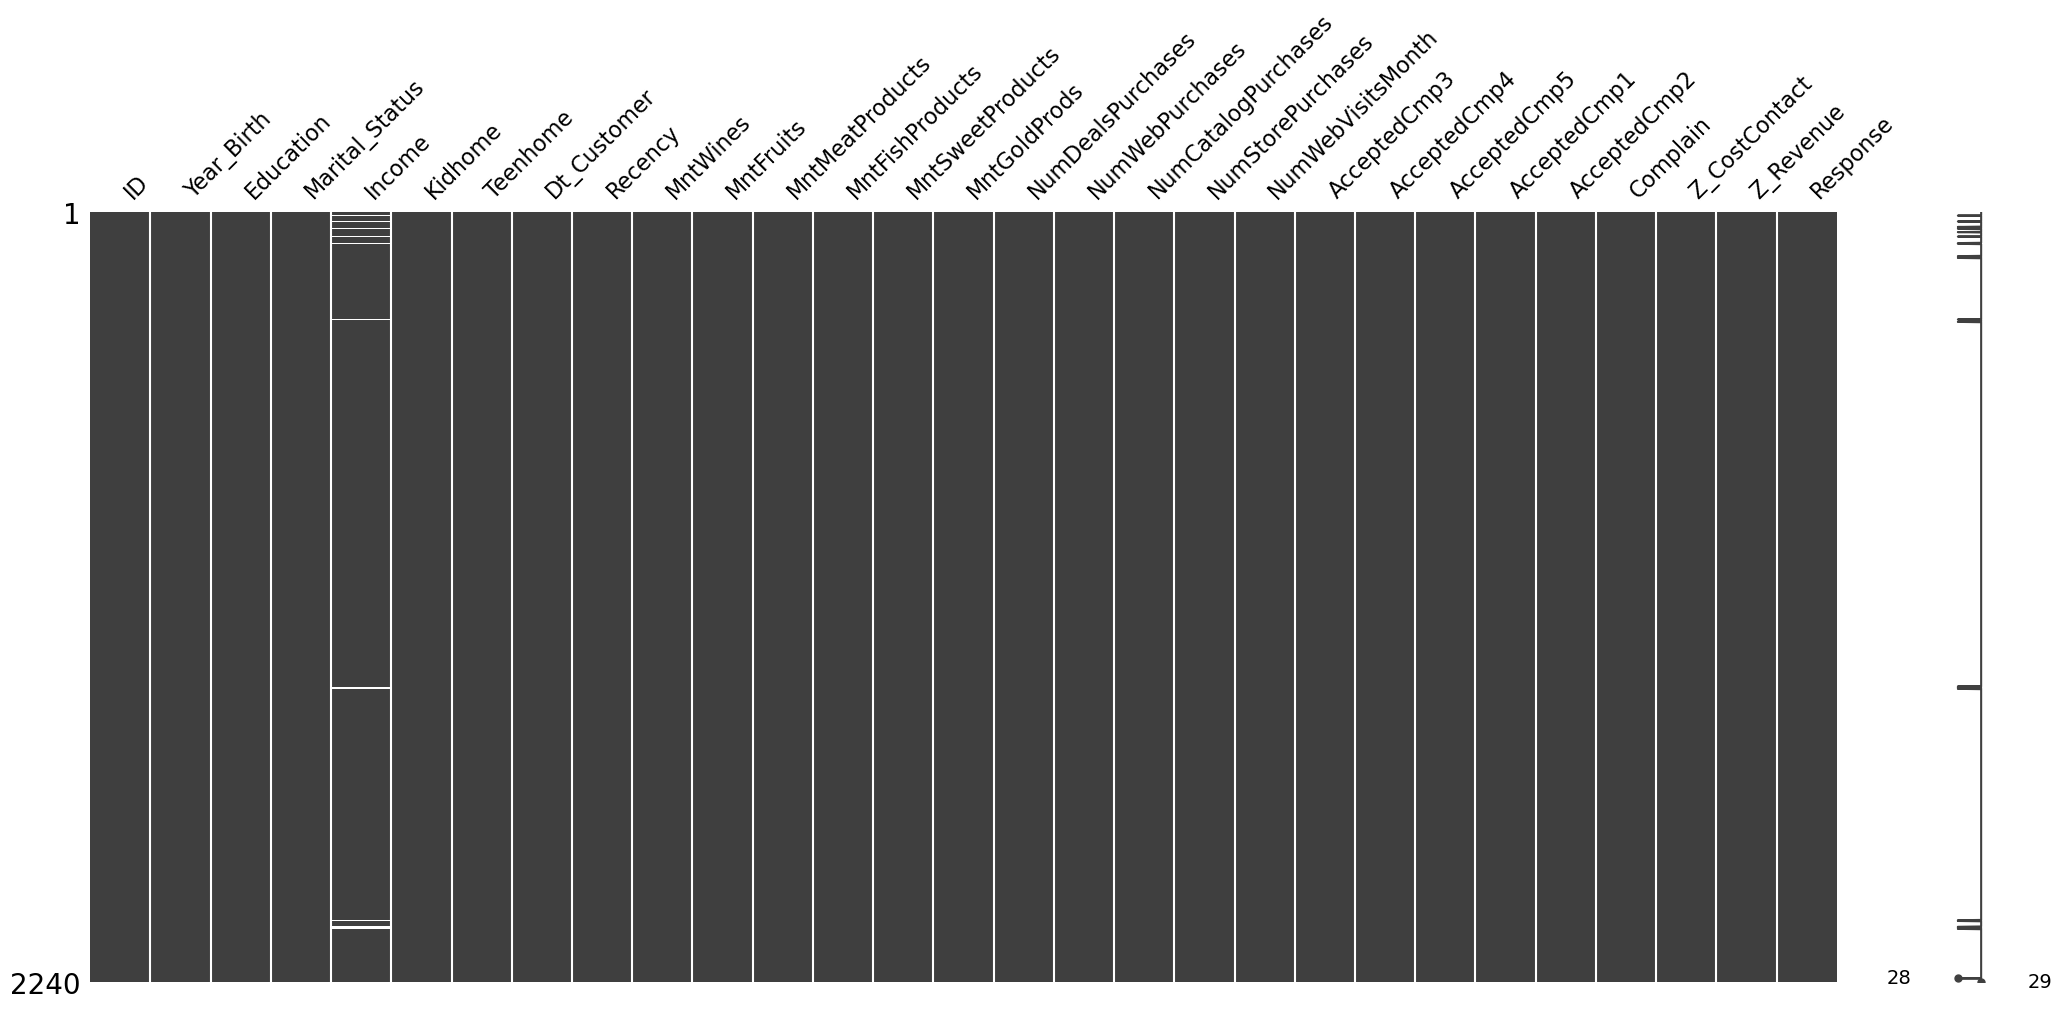

In [11]:
# Missing values matrix
msno.matrix(df_data)
plt.show()

In [12]:
# Missing values sum
missing_values = df_data.isnull().sum().sort_values(ascending = False)

In [13]:
missing_values

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [14]:
# Show all columns with missing values
print(missing_values.loc[missing_values != 0])

Income    24
dtype: int64


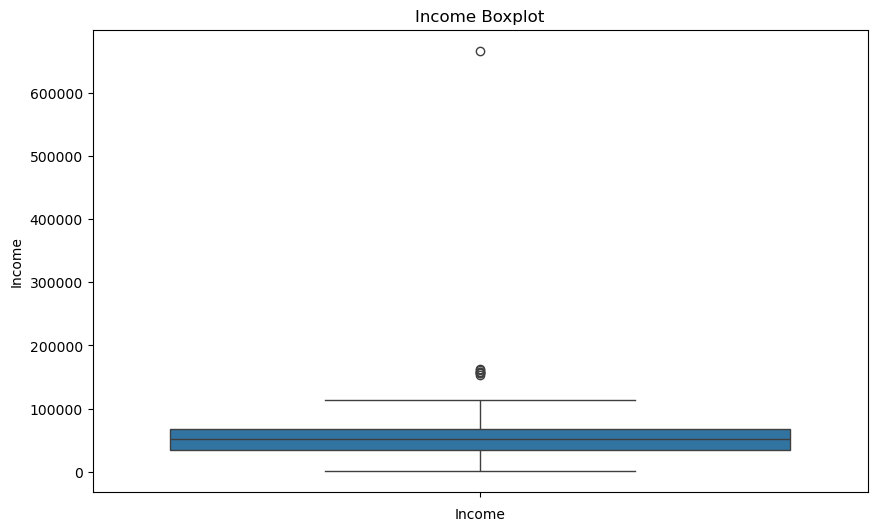

In [15]:
# Boxplot to visualise if have outliers in the income colummn
plt.figure(figsize =(10,6))
sns.boxplot(df_data['Income'])
plt.title('Income Boxplot')
plt.xlabel('Income')
plt.show()

The distance between the two circle, shows that there is outliers in the variable

In [16]:
# Calc the IQR to Income column
# In the image above, the blu box has three lines. From down to up: the first is Q1(0.25), the middle line is the median(0.50) 
# and the third line is Q3(0.75) 
Q1 = df_data['Income'].quantile(0.25)
Q3 = df_data['Income'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Defining the limits to consider a point as a outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Identifying outliers
outliers = df_data[(df_data['Income'] < lower_bound) | (df_data['Income'] > upper_bound)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2001-08-13,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2002-02-14,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2003-09-13,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2011-12-07,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2012-12-19,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-12-23,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2007-08-13,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2010-01-13,23,9,...,6,0,0,0,0,0,0,3,11,0


In my dataset appear 8 outliers

> validate the variable distribution


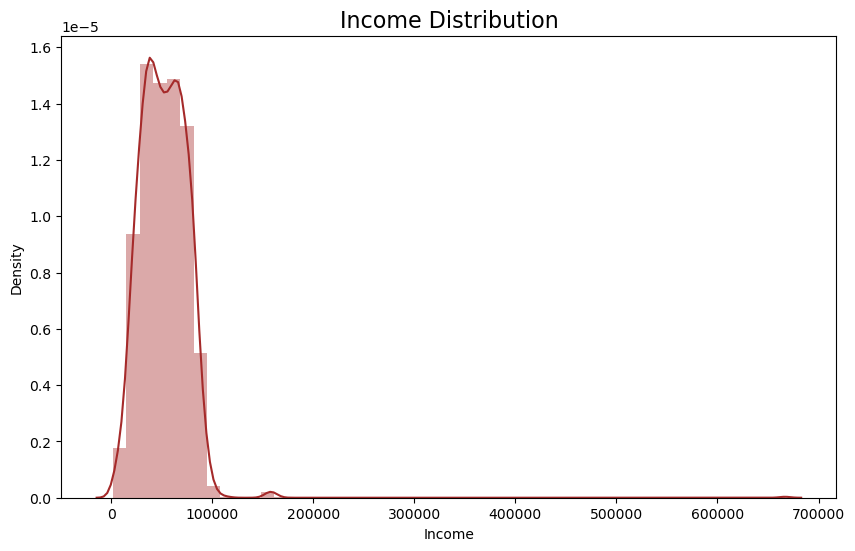

In [19]:
# Defining the figure size
plt.figure(figsize = (10,6))

#Creating the distribution graph
sns.distplot(df_data['Income'], color = 'brown')

# Defining the Title
plt.title('Income Distribution', size = 16)

# Show graph
plt.show()

* How my dataset has only 8 registers with outliers, I will remove them.

In [20]:
# Filtering the dataset and removing outliers
df_data = df_data[(df_data['Income'] >= lower_bound) & (df_data['Income'] <= upper_bound)]

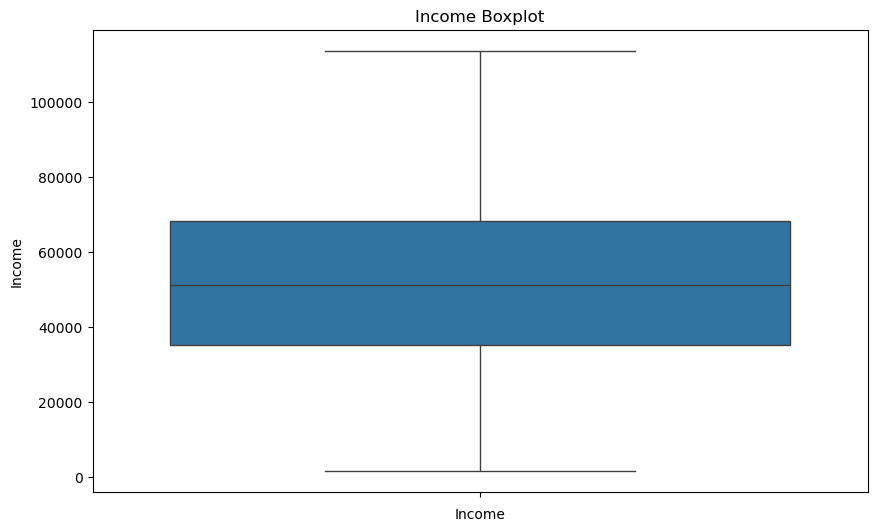

In [21]:
# Boxplot without outliers
plt.figure(figsize =(10,6))
sns.boxplot(df_data['Income'])
plt.title('Income Boxplot')
plt.xlabel('Income')
plt.show()

Treatment of missing values

In [22]:
## To use KNN the data needs to be on the same scale. To put the data on the same scale I need to normalise/standardise. 
## The first step is to normalise the data.
# Normalise data before applying KNNImputer (optional, but recommended)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data[['Income']])

In [23]:
# Create the KNNImputer
imputer = KNNImputer(n_neighbors =5)

In [24]:
# Imput missing values with imputer
data_imputed = imputer.fit_transform(data_scaled)

In [25]:
# To convert to the original format. Returning the data to the normal scale (original format)
df_data['Income'] = scaler.inverse_transform(data_imputed)

In [26]:
print('Total Missing Values: ', df_data.isnull().sum().sum())

Total Missing Values:  0


In [27]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,5,0,0,0,0,0,0,3,11,0


## Exploratory Analysis and Attribute Engineering

In [28]:
# Columns
df_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [29]:
# Drop (in memory) of category columns to create the box plot from quantitative columns
data_boxplot = df_data.drop(columns = ['ID',
                                        'Education',
                                        'Marital_Status',
                                        'Kidhome',
                                        'Teenhome', 
                                        'Dt_Customer', 
                                        'AcceptedCmp3',
                                        'AcceptedCmp4', 
                                        'AcceptedCmp5', 
                                        'AcceptedCmp1',
                                         'AcceptedCmp2'])
    

In [30]:
data_boxplot.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

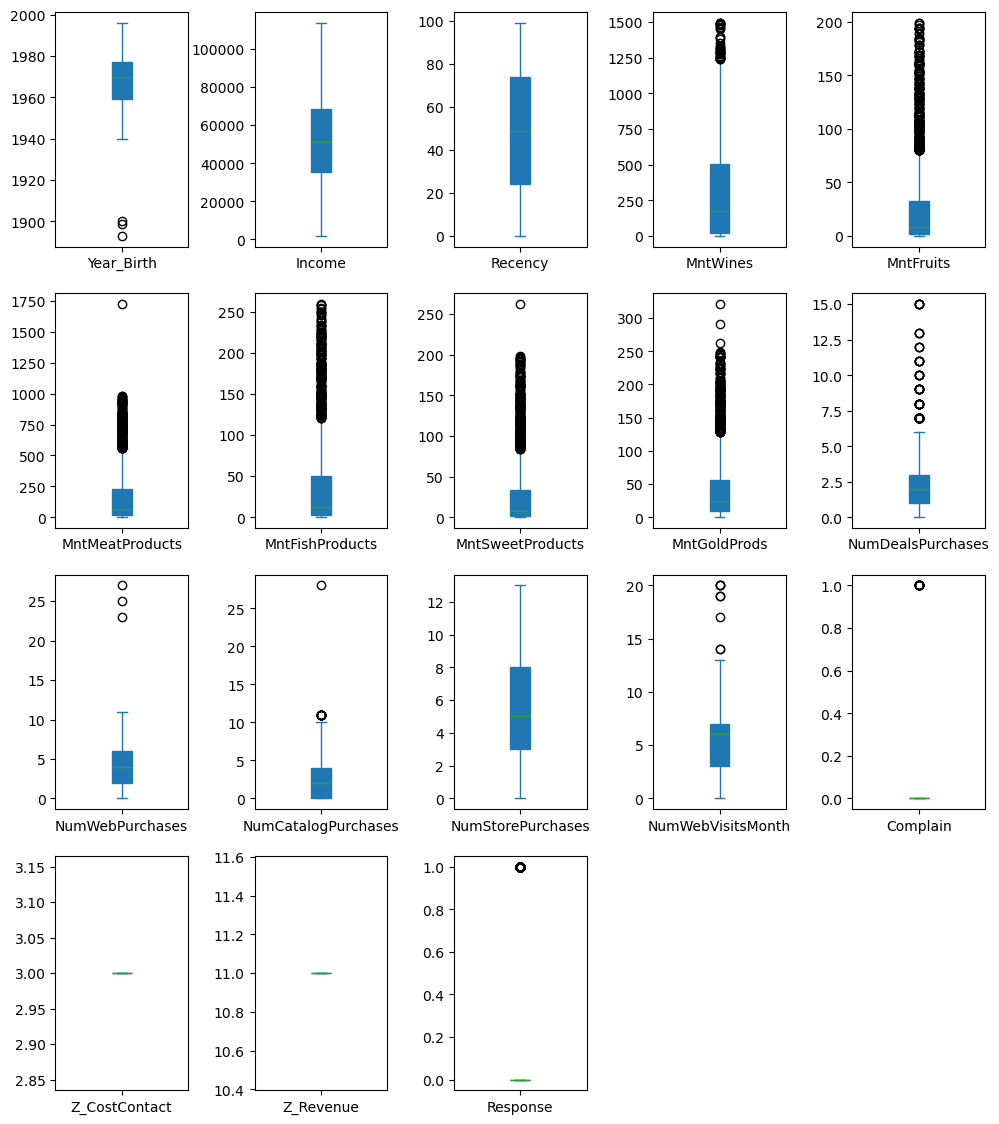

In [31]:
# Plot
data_boxplot.plot(subplots = True, layout =(4,5), kind ='box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

Attribute engineering in **data science** is the process of creating, selecting, and transforming variables or features from raw data to improve the performance of machine learning models.

Attribute engineering in the **data exploration process** involves creating, transforming, and selecting meaningful features from raw data to facilitate deeper insights and more effective analysis.

In [32]:
# Creating a column with the age of each client (current year - birth year)
current_year = datetime.now().year
df_data['Age'] = current_year - df_data['Year_Birth']

In [33]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,0,0,0,0,0,3,11,0,43


In [34]:
# Create a column with the number of days as the client from Dt_Customer
df_data['Days_as_Customer'] = df_data['Dt_Customer'].max() - df_data['Dt_Customer']

In [35]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,0,0,0,0,3,11,1,67,255 days
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,0,0,0,0,3,11,0,70,259 days
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,0,0,0,0,3,11,0,59,1294 days
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,0,0,0,0,3,11,0,40,272 days
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,0,0,0,0,3,11,0,43,2665 days


In [36]:
# Remove the word 'days' from the Days_as_Customer column
df_data['Days_as_Customer'] = df_data['Days_as_Customer'].astype(str).str.replace(' days', '')

In [37]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,0,0,0,0,3,11,1,67,255
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,0,0,0,0,3,11,0,70,259
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,0,0,0,0,3,11,0,59,1294
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,0,0,0,0,3,11,0,40,272
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,0,0,0,0,3,11,0,43,2665


In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

In [39]:
# Adjust the data type from the 'Days_as_Customer' variable
df_data['Days_as_Customer']= pd.to_numeric(df_data['Days_as_Customer'], downcast = 'integer')

In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

In [41]:
# Create a variable with the total purchases considering all company channels
# Example of dimensionality reduction
df_data['Total_Purchase'] = df_data['NumWebPurchases'] + df_data['NumCatalogPurchases'] + df_data['NumStorePurchases']

In [42]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,0,0,0,3,11,1,67,255,22
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,0,0,0,3,11,0,70,259,4
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,0,0,0,3,11,0,59,1294,20
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,0,0,0,3,11,0,40,272,6
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,0,0,0,3,11,0,43,2665,14


In [43]:
# Create a 'Total_Expense' variable with the sum of all columns that start with 'Mnt'
df_data['Total_Expense'] = df_data.filter(like = 'Mnt').sum(axis=1)

In [44]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase,Total_Expense
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,0,0,3,11,1,67,255,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,0,0,3,11,0,70,259,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,0,0,3,11,0,59,1294,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,0,0,3,11,0,40,272,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,0,0,3,11,0,43,2665,14,422


In [45]:
# Create a variable that indicates if the client accepted any campaign (and purchased the offered product)
df_data['Total_Acepted_Campaign'] = df_data.filter(like = 'Accepted').sum(axis =1)

In [46]:
df_data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase,Total_Expense,Total_Acepted_Campaign
208,868,1966,Graduation,Married,44794.0,0,1,2009-12-11,99,54,...,0,0,3,11,0,58,1661,5,65,0
281,10144,1976,Graduation,Together,51369.0,0,1,2013-01-21,84,297,...,0,0,3,11,0,48,524,14,576,0
636,6945,1952,Graduation,Single,84574.0,0,0,2012-11-17,72,387,...,0,0,3,11,0,72,589,31,1375,0
844,5332,1960,2n Cycle,Married,82504.0,0,0,2012-07-13,2,362,...,0,0,3,11,0,64,716,16,1066,0
30,6864,1989,Master,Divorced,10979.0,0,0,2013-09-27,34,8,...,0,0,3,11,0,35,275,6,30,0
1252,5153,1967,PhD,Married,77766.0,0,1,2013-04-13,97,1004,...,0,0,3,11,1,57,442,32,1529,1
831,8560,1992,Graduation,Single,48789.0,0,0,2012-10-24,94,351,...,0,0,3,11,0,32,613,17,680,0
359,4107,1948,PhD,Together,46681.0,0,2,2013-09-28,52,269,...,0,0,3,11,0,76,274,14,425,0
2146,1818,1971,PhD,Together,29732.0,1,0,2014-01-23,23,25,...,0,0,3,11,0,53,157,4,38,0
65,8082,1971,Graduation,Married,25721.0,1,0,2012-09-13,75,1,...,0,0,3,11,1,53,654,4,34,0


In [47]:
# Adjusting the data type and inserting in a new column
# Lambda = anonymous function at runtime
df_data['Answer_Campaign'] = df_data['Total_Acepted_Campaign'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

In [48]:
df_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase,Total_Expense,Total_Acepted_Campaign,Answer_Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2013-10-17,58,635,...,0,3,11,1,67,255,22,1617,0,Not Accepted
1,2174,1954,Graduation,Single,46344.0,1,1,2013-10-13,38,11,...,0,3,11,0,70,259,4,27,0,Not Accepted
2,4141,1965,Graduation,Together,71613.0,0,0,2010-12-13,26,426,...,0,3,11,0,59,1294,20,776,0,Not Accepted
3,6182,1984,Graduation,Together,26646.0,1,0,2013-09-30,26,11,...,0,3,11,0,40,272,6,53,0,Not Accepted
4,5324,1981,PhD,Married,58293.0,1,0,2007-03-13,94,173,...,0,3,11,0,43,2665,14,422,0,Not Accepted


In [49]:
# Ramdon sample of the created variables
df_data[['Age', 'Days_as_Customer', 'Total_Purchase','Total_Expense','Answer_Campaign']].sample(10)

,Age,Days_as_Customer,Total_Purchase,Total_Expense,Answer_Campaign
1561,48,337,15,458,Not Accepted
802,73,3241,7,170,Not Accepted
63,73,4610,18,606,Not Accepted
1812,55,4641,13,914,Accepted
193,36,2115,6,91,Not Accepted
301,68,2634,20,728,Not Accepted
288,58,3119,21,1478,Not Accepted
1359,53,2036,7,131,Not Accepted
462,66,253,7,135,Not Accepted
163,49,529,19,1293,Not Accepted


In [50]:
# Removing unnecessary variables
df_data.drop(['Year_Birth', 'Dt_Customer','Total_Acepted_Campaign'], axis = 1, inplace = True)

In [51]:
df_data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase,Total_Expense,Answer_Campaign
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,3,11,1,67,255,22,1617,Not Accepted
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,3,11,0,70,259,4,27,Not Accepted
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,3,11,0,59,1294,20,776,Not Accepted
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,3,11,0,40,272,6,53,Not Accepted
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,3,11,0,43,2665,14,422,Not Accepted


In [52]:
df_data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchase,Total_Expense
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.0,2208.0,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5586.900815,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,...,0.064312,0.013587,0.009511,3.0,11.0,0.150815,55.192935,1290.258152,12.562500,606.875906
std,3249.110303,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,...,0.245363,0.115795,0.097081,0.0,0.0,0.357950,11.991913,1425.067407,7.180228,602.090272
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,0.000000,0.000000,5.000000
25%,2814.750000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,286.000000,6.000000,69.000000
50%,5458.500000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,573.000000,12.000000,397.000000
75%,8418.500000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,2029.250000,18.000000,1047.250000
max,11191.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000,4915.000000,32.000000,2525.000000


# To Be Continued...